# Design Choices in Recurrent Neural Networks

###  Importing packages

In [5]:
import re
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from keras import backend as K
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.datasets import imdb
import timeit

from keras.utils.np_utils import to_categorical

import warnings
warnings.filterwarnings('ignore')
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

Using TensorFlow backend.


### Preparing Dataset

In [6]:
max_features = 1000
maxlen = 80  # cut texts after this number of words (among top max_features most common words)
batch_size = 64

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)


## Part 1: Influence of number of nodes

Try the models with different number of nodes such as 32, 64, 128 etc.

Analyze the number of model parameters, accuracy and training time

### LSTM with 8 nodes

In [7]:
K.clear_session()
start = timeit.default_timer()   
model = Sequential()
model.add(Embedding(max_features, 8))
model.add(LSTM(8, dropout=0.0, recurrent_dropout=0.0))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=3, validation_data=(x_test, y_test))

end = timeit.default_timer()
print("Time Taken to run the model:",end - start, "seconds") 

score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 8)           8000      
_________________________________________________________________
lstm_1 (LSTM)                (None, 8)                 544       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 8,553
Trainable params: 8,553
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 9s 370us/step - loss: 0.5539 - accuracy: 0.7144 - val_loss: 0.4349 - val_accuracy: 0.8044
Epoch 2/3
25000/25000 [==============================] - 9s 371us/step - loss: 0.4142 - ac

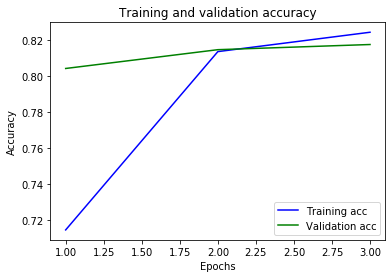

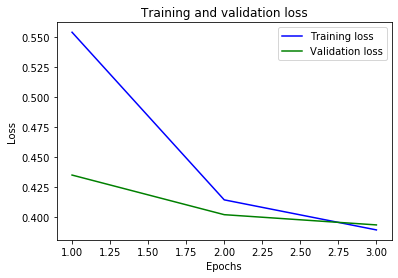

In [8]:
# Plotting Results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.title('Training and validation accuracy')
plt.legend()
fig = plt.figure()
fig.savefig('acc.png')


plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss')

plt.legend()
plt.show()

### LSTM with 16 nodes

In [9]:
K.clear_session()
start = timeit.default_timer()   
model = Sequential()
model.add(Embedding(max_features, 8))
model.add(LSTM(16, dropout=0.0, recurrent_dropout=0.0))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=3, validation_data=(x_test, y_test))

end = timeit.default_timer()
print("Time Taken to run the model:",end - start, "seconds") 

score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 8)           8000      
_________________________________________________________________
lstm_1 (LSTM)                (None, 16)                1600      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 9,617
Trainable params: 9,617
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 10s 406us/step - loss: 0.5269 - accuracy: 0.7253 - val_loss: 0.4139 - val_accuracy: 0.8114
Epoch 2/3
25000/25000 [==============================] - 10s 396us/step - loss: 0.4041 - accuracy: 0.8176 - val_loss: 0.3943 - val_accuracy: 0.8207
Epoch 3/3
25000/25000 [=============

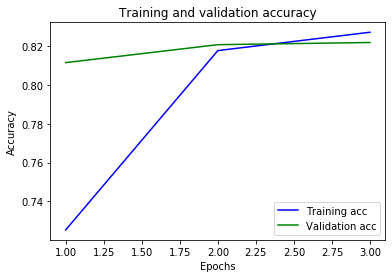

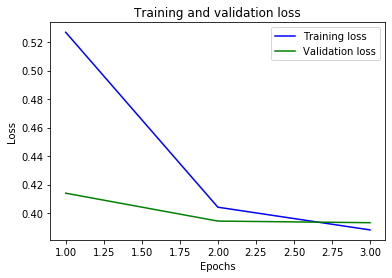

In [10]:
# Plotting Results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.title('Training and validation accuracy')
plt.legend()
fig = plt.figure()
fig.savefig('acc.png')


plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss')

plt.legend()
plt.show()

### Write your findings about number of nodes here?

1. As can be seen from the graphs, increasing the number of nodes is not a solution to increase accuracy. Of course this finding like other findings only applies to this model. From here we can conclude that we need to change other hyperparameters to increase accuracy.


2. As the number of nodes increases, the number of parameters increases. This causes an increase in processing time.

## Part 2: Influence of Embedding



In [33]:
K.clear_session()
start = timeit.default_timer()   
model = Sequential()
model.add(Embedding(max_features, 8))
model.add(LSTM(16, dropout=0.0, recurrent_dropout=0.0))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=batch_size, epochs=2, validation_data=(x_test, y_test))

end = timeit.default_timer()
print("Time Taken to run the model:",end - start, "seconds") 

score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 8)           8000      
_________________________________________________________________
lstm_1 (LSTM)                (None, 16)                1600      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 9,617
Trainable params: 9,617
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 10s 397us/step - loss: 0.5382 - accuracy: 0.7168 - val_loss: 0.4158 - val_accuracy: 0.8130
Epoch 2/2
25000/25000 [==============================] - 10s 387us/step - loss: 0.4009 - accuracy: 0.8188 - val_loss: 0.3986 - val_accuracy: 0.8144
Time Taken to run the model: 20.2420

In [32]:
K.clear_session()
start = timeit.default_timer()   
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(16, dropout=0.0, recurrent_dropout=0.0))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=batch_size, epochs=2, validation_data=(x_test, y_test))

end = timeit.default_timer()
print("Time Taken to run the model:",end - start, "seconds") 

score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          32000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 16)                3136      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 35,153
Trainable params: 35,153
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 12s 464us/step - loss: 0.4954 - accuracy: 0.7488 - val_loss: 0.4013 - val_accuracy: 0.8143
Epoch 2/2
25000/25000 [==============================] - 11s 456us/step - loss: 0.3954 - accuracy: 0.8220 - val_loss: 0.3881 - val_accuracy: 0.8220
Time Taken to run the model: 23.54

### Write your findings about number of embedding features here?

1.   As the number of embedding features increases, the accuracy of the model also increases. Perhaps an added feature determines that the sample that was previously considered negative is actually positive.


2.   As the number of embedding features increases, the number of parameters of the model also increases. This causes an increase in running time.


## Part 3: Influence of Dropout

Try the models with different rates of dropout from 0 to 1

Analyze the number of model parameters, accuracy and training time

### Dropout with rate 0.5

In [34]:
K.clear_session()
start = timeit.default_timer()   
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(8, dropout=0.5, recurrent_dropout=0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=batch_size, epochs=3, validation_data=(x_test, y_test))

end = timeit.default_timer()
print("Time Taken to run the model:",end - start, "seconds") 

score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          32000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 8)                 1312      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 33,321
Trainable params: 33,321
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 10s 408us/step - loss: 0.6145 - accuracy: 0.6670 - val_loss: 0.5263 - val_accuracy: 0.7408
Epoch 2/3
25000/25000 [==============================] - 11s 421us/step - loss: 0.5137 - accuracy: 0.7532 - val_loss: 0.4874 - val_accuracy: 0.7667
Epoch 3/3
25000/25000 [===========

In [35]:
K.clear_session()
start = timeit.default_timer()   
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(8, dropout=0.3, recurrent_dropout=0.3))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=batch_size, epochs=3, validation_data=(x_test, y_test))

end = timeit.default_timer()
print("Time Taken to run the model:",end - start, "seconds") 

score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          32000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 8)                 1312      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 33,321
Trainable params: 33,321
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 10s 396us/step - loss: 0.5800 - accuracy: 0.7014 - val_loss: 0.4804 - val_accuracy: 0.7721
Epoch 2/3
25000/25000 [==============================] - 10s 396us/step - loss: 0.4848 - accuracy: 0.7730 - val_loss: 0.4567 - val_accuracy: 0.7884
Epoch 3/3
25000/25000 [===========

In [36]:
K.clear_session()
start = timeit.default_timer()   
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(8, dropout=0.1, recurrent_dropout=0.1))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=batch_size, epochs=3, validation_data=(x_test, y_test))

end = timeit.default_timer()
print("Time Taken to run the model:",end - start, "seconds") 

score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          32000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 8)                 1312      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 33,321
Trainable params: 33,321
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 11s 440us/step - loss: 0.5745 - accuracy: 0.7088 - val_loss: 0.4614 - val_accuracy: 0.7928
Epoch 2/3
25000/25000 [==============================] - 10s 399us/step - loss: 0.4531 - accuracy: 0.7938 - val_loss: 0.4208 - val_accuracy: 0.8111
Epoch 3/3
25000/25000 [===========

### Write your findings about influence of dropout rate here?

1.   Droupout is used when the model is overfitting. In the samples, it was observed that as the dropout decreased, accuracy increased. In other words, there is no situation where certain nodes in the model learn more than others.


2.   Since the number of parameters does not change, there is no change in the processing time either.


## Part 4: Multilayered RNNs

Try the models with different number of layers from smaller to larger.

Analyze the number of model parameters, accuracy and training time

### RNN with 2 layer LSTM

In [42]:
K.clear_session()
start = timeit.default_timer()   
model = Sequential()
model.add(Embedding(max_features, 16))
model.add(LSTM(16, dropout=0.0, recurrent_dropout=0.0, return_sequences=True))
model.add(LSTM(8, dropout=0.0, recurrent_dropout=0.0, return_sequences=True))
model.add(LSTM(8, dropout=0.0, recurrent_dropout=0.0))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history1 = model.fit(x_train, y_train, batch_size=batch_size, epochs=5, validation_data=(x_test, y_test))

end = timeit.default_timer()
print("Time Taken to run the model:",end - start, "seconds") 

score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          16000     
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 16)          2112      
_________________________________________________________________
lstm_2 (LSTM)                (None, None, 8)           800       
_________________________________________________________________
lstm_3 (LSTM)                (None, 8)                 544       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 19,465
Trainable params: 19,465
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 27s 1ms/s

### RNN with 3 layer LSTM

In [43]:
K.clear_session()
start = timeit.default_timer()   
model = Sequential()
model.add(Embedding(max_features, 16))
model.add(LSTM(16, dropout=0.0, recurrent_dropout=0.0, return_sequences=True))
model.add(LSTM(8, dropout=0.0, recurrent_dropout=0.0, return_sequences=True))
model.add(LSTM(8, dropout=0.0, recurrent_dropout=0.0, return_sequences=True))
model.add(LSTM(8, dropout=0.0, recurrent_dropout=0.0))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=5, validation_data=(x_test, y_test))

end = timeit.default_timer()
print("Time Taken to run the model:",end - start, "seconds") 

score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          16000     
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 16)          2112      
_________________________________________________________________
lstm_2 (LSTM)                (None, None, 8)           800       
_________________________________________________________________
lstm_3 (LSTM)                (None, None, 8)           544       
_________________________________________________________________
lstm_4 (LSTM)                (None, 8)                 544       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 20,009
Trainable params: 20,009
Non-trainable params: 0
__________________________________________________

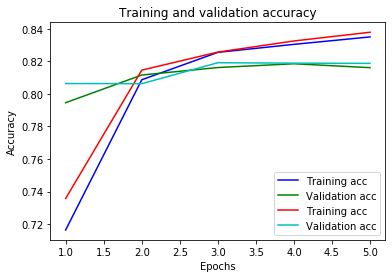

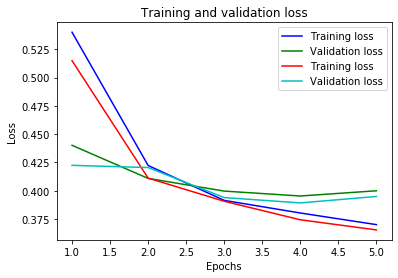

In [44]:
# Plotting Results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

acc1 = history1.history['accuracy']
val_acc1 = history1.history['val_accuracy']
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']
epochs1 = range(1, len(acc1) + 1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.plot(epochs1, acc1, 'r', label='Training acc')
plt.plot(epochs1, val_acc1, 'c', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')


plt.title('Training and validation accuracy')
plt.legend()
fig = plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss')

plt.plot(epochs1, loss1, 'r', label='Training loss')
plt.plot(epochs1, val_loss1, 'c', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss')

plt.legend()
plt.show()

### Write your findings about number of layers here?

1. Although the model with more layers with little difference is successful, it would be better to change other hyperparameters to increase success because this difference is very small.


2. The number of parameters increases as the new layer is added thus the processing time is also increasing. 